Visualizations are available at: https://colab.research.google.com/drive/1ejOmCYRBFf1YUxyKefgo2U5qQxTevMsw?usp=sharing

In [1]:
import pandas as pd
import sys
import torch
import numpy as np

In [2]:
# !unzip '/content/drive/MyDrive/Proj3.zip' -d '/content/drive/MyDrive/Colab Notebooks/Proj3'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/train_transaction.csv')

In [5]:
df.shape

(590540, 394)

In [6]:
df_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/train_identity.csv')[['TransactionID','DeviceType']]

It will be explained why I didn't keep other columns.

<h2>Preprocessing:<h2>

In [7]:
df_id.shape

(144233, 2)

In [8]:
df_id.columns

Index(['TransactionID', 'DeviceType'], dtype='object')

In [9]:
sys.getsizeof(df) /1024 / 1024 / 1024

2.051466239616275

In [10]:
df.info

<bound method DataFrame.info of         TransactionID  isFraud  TransactionDT  ...  V337 V338  V339
0             2987000        0          86400  ...   NaN  NaN   NaN
1             2987001        0          86401  ...   NaN  NaN   NaN
2             2987002        0          86469  ...   NaN  NaN   NaN
3             2987003        0          86499  ...   NaN  NaN   NaN
4             2987004        0          86506  ...   0.0  0.0   0.0
...               ...      ...            ...  ...   ...  ...   ...
590535        3577535        0       15811047  ...   NaN  NaN   NaN
590536        3577536        0       15811049  ...   NaN  NaN   NaN
590537        3577537        0       15811079  ...   NaN  NaN   NaN
590538        3577538        0       15811088  ...   NaN  NaN   NaN
590539        3577539        0       15811131  ...   NaN  NaN   NaN

[590540 rows x 394 columns]>

In [11]:
df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [12]:
df_id.isna().sum()

TransactionID       0
DeviceType       3423
dtype: int64

In [13]:
df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_id.head(3)

,TransactionID,DeviceType
0,2987004,mobile
1,2987008,mobile
2,2987010,desktop


In [15]:
len(np.intersect1d(df['TransactionID'],df_id['TransactionID']))

144233

In [16]:
df_id['DeviceType'].unique()

array(['mobile', 'desktop', nan], dtype=object)

Outer join on both dataframes to have all rows.

In [17]:
df = pd.merge(df,df_id,on='TransactionID',how='outer')

In [18]:
#To free memory capacity
del df_id

In [19]:
df.shape

(590540, 395)

Are not matched. So we have to join them on TransactionID

In [20]:
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [21]:
target = df['isFraud']

that is already normalized
cuz it's only 0,1

In [22]:
df.drop(labels=['isFraud','TransactionID'],axis = 1,inplace = True)

In [23]:
#Onehot enocoding to transform categorical columns to numeric
df = pd.get_dummies(df)

In [24]:
df.head(3)

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,...,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,DeviceType_desktop,DeviceType_mobile
0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0


Remove all null columns and fill other null values with the median of their belonging column.

In [25]:
for c in df.columns:
  if df[c].isnull().sum() == len(df[c]):
    df.drop(labels = [c],axis = 1,inplace = True)
    continue

  df [c] = df[c].fillna(np.nanmedian(df[c]))


In [26]:
df.head(3)

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,...,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,DeviceType_desktop,DeviceType_mobile
0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,19.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,97.0,13.0,26.0,10.0,0.0,0.0,37.875,0.666666,13.0,13.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,8.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,0.0,37.875,0.666666,0.0,43.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,97.0,8.0,0.0,10.0,0.0,0.0,37.875,0.666666,0.0,315.0,0.0,0.0,0.0,315.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0


<h4>Normalization:<h4>

In [27]:
for c in df.columns:

  min = df[c].min()
  max = df[c].max()
  df[c] = ((df[c]-min)/max).astype('float32')

  #Again check whether there is null column
  if df[c].isnull().sum() == len(df[c]):
    df.drop(labels = [c],axis = 1,inplace = True)
  

In [28]:
df.shape

(590540, 531)

In [29]:
df.head(3)

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,...,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,DeviceType_desktop,DeviceType_mobile
0,0.000000e+00,0.002137,0.702653,0.435000,0.21645,0.177215,0.398148,0.754902,0.001847,0.003183,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0,0.004762,0.0,0.000627,0.0,0.000343,0.0007,0.021875,0.151562,0.015873,0.170311,0.01221,0.095074,0.0,0.022178,0.695652,0.01484,0.098507,0.128086,0.0,0.219818,0.094425,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.324658e-08,0.000900,0.095401,0.506667,0.21645,0.008439,0.416667,0.754902,0.000778,0.003183,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0,0.000000,0.0,0.000314,0.0,0.000343,0.0007,0.000000,0.151562,0.009768,0.140391,0.01221,0.095074,0.0,0.022178,0.695652,0.00000,0.143284,0.128086,0.0,0.219818,0.094425,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.364014e-06,0.001840,0.199119,0.650000,0.21645,0.278481,0.425926,0.754902,0.027902,0.003183,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0,0.004762,0.0,0.000314,0.0,0.000343,0.0007,0.000000,0.151562,0.009768,0.140391,0.01221,0.095074,0.0,0.022178,0.695652,0.00000,0.549254,0.128086,0.0,0.219818,0.452787,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
sys.getsizeof(df)/1024/1024/1024 #in GB

1.1725642755627632

Size of df has been reduced in compare to the begining.

In [31]:
length = df.shape[1]

In [32]:
print([i for i in df.columns])

['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',

In [33]:
df.isnull().sum()

TransactionDT         0
TransactionAmt        0
card1                 0
card2                 0
card3                 0
                     ..
M8_T                  0
M9_F                  0
M9_T                  0
DeviceType_desktop    0
DeviceType_mobile     0
Length: 531, dtype: int64

As we expected there is no null value and also all data are normalized and transformed to [0,1].

<h2>Under Sampling:<h2>



There's an idea:

It seems there would be a pattern and compatibility among correct data but fraud must be outliers while having no pattern.
So in first phase, we use autoencoder and trainn that only with correct data and then try on fraud set.

Then we expect the loss value of correct data prediction would be far less than fraud loss value.

In [34]:
import sklearn.model_selection as skm

Validation set is for after training.
Other set is going to be splitted to train and test sets while test is used in the training process.

In [35]:
X_other,  X_valid ,y_other , y_valid = skm.train_test_split(df , target , test_size = 0.1)

In [36]:
X_other.shape

(531486, 531)

In [37]:
#For train
X_correct = torch.FloatTensor(X_other[y_other == 0].values)
y_correct = torch.FloatTensor(y_other[y_other == 0].values)

X_fraud = torch.FloatTensor(X_other[y_other == 1].values)
y_fraud = torch.FloatTensor(y_other[y_other == 1].values)

del X_other
del y_other

X_valid_corr = torch.FloatTensor(X_valid[y_valid == 0].values)
X_valid_fraud = torch.FloatTensor(X_valid[y_valid == 1].values)

In [38]:
X_valid_fraud

tensor([[3.9798e-01, 3.7051e-04, 5.2011e-01,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [8.0781e-01, 3.3722e-03, 2.7283e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [9.6093e-01, 1.0316e-03, 5.1930e-01,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [7.8021e-01, 1.4865e-02, 1.8591e-02,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [1.1444e-01, 4.4070e-03, 8.7997e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.7089e-01, 3.3722e-03, 1.7786e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [39]:
len(X_valid_fraud)

2001

In [40]:
len(X_correct)

512824

In [41]:
X_train, X_test , y_train, y_test = skm.train_test_split(X_correct , y_correct , test_size = 0.2 )

In [42]:
len(X_train)

410259

In [43]:
y_train

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [44]:
del df

In [45]:
del X_correct
del y_correct

In [46]:
import torch.utils.data as dt

In [47]:
X_train[0][:10]

tensor([2.6691e-01, 1.5638e-03, 8.0914e-01, 7.4167e-01, 3.6797e-01, 1.6034e-01,
        3.6852e-01, 7.5490e-01, 7.7776e-04, 4.8180e-03])

In [48]:
batch_size = 300

x_train_correct_dl = dt.DataLoader(X_train,batch_size=batch_size)
y_train_correct_dl = dt.DataLoader(y_train,batch_size=batch_size)

x_test_correct_dl = dt.DataLoader(X_test,batch_size=batch_size)
y_test_correct_dl = dt.DataLoader(y_test,batch_size=batch_size)


<h2>Create Model:<h2>

In [49]:
import torch.nn as nn

In [50]:
import torch.nn.functional as F

In [109]:
class AutoEncoder(nn.Module):
    def __init__(self, length):
        super().__init__()

        self.lin1 = nn.Linear(length,300)
        self.linb1 = nn.BatchNorm1d(300)
        self.lin2 = nn.Linear(300,150)
        self.linb2 = nn.BatchNorm1d(150)
        self.lin3 = nn.Linear(150,75)
        self.linb3 = nn.BatchNorm1d(75)
        self.lin4 = nn.Linear(75,30)
        self.lin45 = nn.Linear(30,10)
        self.linb4 = nn.BatchNorm1d(10)
        self.lin46 = nn.Linear(10,30)
        self.lin5 = nn.Linear(30,75)
        self.linb5 = nn.BatchNorm1d(75)
        self.lin6 = nn.Linear(75,150)
        self.lin7 = nn.Linear(150,300)
        self.linb6 = nn.BatchNorm1d(300)
        self.lin8 = nn.Linear(300,length)
        # self.lin9 = nn.Linear(400,length)

        self.drop2 = nn.Dropout(0.05)

    def forward(self, data):
        x = F.relu(self.lin1(data))
        # x = self.lin1(x)
        x = self.linb1(x)
        x = self.drop2(F.relu(self.lin2(x)))
        x = self.linb2(x)
        x = self.lin3(x)
        x= F.relu(x)
        x = self.linb3(x)
        x = self.drop2(x)
        x = F.relu(self.lin4(x))
        x = F.relu(self.lin45(x))
        x = self.linb4(x)
        x = F.relu(self.lin46(x))
        x = F.relu(self.lin5(x))
        x = self.linb5(x)
        x = self.drop2(x)
        x = F.relu(self.lin6(x))
        x = F.relu(self.lin7(x))
        x = self.linb6(x)
        x = self.lin8(x)
        # x = self.lin9(x)

        return x

def test(x):
  model.eval()
  # test_loss = 0
  # correct = 0
  with torch.no_grad():
    predicted = model(V(x))
    real = V(x)
    return loss(predicted , real ).item()


In [52]:
import torch.optim
import collections

In [110]:
model = AutoEncoder(length)

loss=nn.MSELoss()
learning_rate = 1e-2
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

print(model)

model_hist = collections.namedtuple('Model','epoch loss val_loss')
model_loss = model_hist(epoch = [], loss = [], val_loss = [])


AutoEncoder(
  (lin1): Linear(in_features=531, out_features=300, bias=True)
  (linb1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin2): Linear(in_features=300, out_features=150, bias=True)
  (linb2): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin3): Linear(in_features=150, out_features=75, bias=True)
  (linb3): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin4): Linear(in_features=75, out_features=30, bias=True)
  (lin45): Linear(in_features=30, out_features=10, bias=True)
  (linb4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin46): Linear(in_features=10, out_features=30, bias=True)
  (lin5): Linear(in_features=30, out_features=75, bias=True)
  (linb5): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin6): Linear(in_features=75, out_features=150, bias=True)
  (lin7): Linear(in_features=150, 

In [54]:
from tqdm import tqdm, tqdm_notebook

In [55]:
from torch.autograd import Variable as V

In [56]:
x_train_correct_dl

In [57]:
def train(epochs, model, model_loss):
    is_overfitted = int(0)
    last_val_loss = 1000 #For Early Stopping
    try: c = model_loss.epoch[-1]

    except: c = 0
    for epoch in tqdm_notebook(range(epochs),position=0, total = epochs):
        losses=[]
        dl = iter(x_train_correct_dl)
        for t in range(len(dl)):
            model.train()
          
            xt = next(dl)
            y_pred = model(V(xt))
            
            l = loss(y_pred,V(xt))
            losses.append(l)
            optimizer.zero_grad()

            l.backward()

            optimizer.step()

        losss= l.item()
        if (epoch+1) % 5 == 0:
              
          val_dl = iter(x_test_correct_dl)
          val_scores = [test(next(val_dl)) for i in range(len(val_dl))]

          model_loss.epoch.append(c+epoch)
          model_loss.loss.append(l.item())
          model_loss.val_loss.append(np.mean(val_scores))

          val_losss = np.mean(val_scores)

          #Check out loss for early stopping
          if val_losss > last_val_loss:
            is_overfitted +=1
          else:
            is_overfitted = 0
            
          last_val_loss = val_losss
          if is_overfitted == 3:
            print('Starts to overfitting!')
            break;

          print(f'Epoch: {epoch+1}   Loss: {losss:.4f}  Val_Loss on correct set: {val_losss:.4f}')

        else:
          print(f'Epoch: {epoch+1}   Loss: {losss:.4f}')

In [58]:
epochs = 120

In [59]:
train(model=model, epochs=epochs, model_loss=model_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Epoch: 1   Loss: 0.0034
Epoch: 2   Loss: 0.0027
Epoch: 3   Loss: 0.0022
Epoch: 4   Loss: 0.0019
Epoch: 5   Loss: 0.0018  Val_Loss on correct set: 0.0014
Epoch: 6   Loss: 0.0016
Epoch: 7   Loss: 0.0016
Epoch: 8   Loss: 0.0015
Epoch: 9   Loss: 0.0014
Epoch: 10   Loss: 0.0015  Val_Loss on correct set: 0.0011
Epoch: 11   Loss: 0.0013
Epoch: 12   Loss: 0.0013
Epoch: 13   Loss: 0.0013
Epoch: 14   Loss: 0.0012
Epoch: 15   Loss: 0.0012  Val_Loss on correct set: 0.0009
Epoch: 16   Loss: 0.0012
Epoch: 17   Loss: 0.0011
Epoch: 18   Loss: 0.0011
Epoch: 19   Loss: 0.0012
Epoch: 20   Loss: 0.0011  Val_Loss on correct set: 0.0009
Epoch: 21   Loss: 0.0011
Epoch: 22   Loss: 0.0011
Epoch: 23   Loss: 0.0011
Epoch: 24   Loss: 0.0011
Epoch: 25   Loss: 0.0011  Val_Loss on correct set: 0.0022
Epoch: 26   Loss: 0.0012
Epoch: 27   Loss: 0.0011
Epoch: 28   Loss: 0.0011
Epoch: 29   Loss: 0.0011
Epoch: 30   Loss: 0.0011  Val_Loss on correct set: 0.0008
Epoch: 31   Loss: 0.0010
Epoch: 32   Loss: 0.0010
Epoch: 33  

Separately try again on test set for each single data and draw a plot to see whether there would be a point to divide into fraud and correct datasets.

In [60]:
#AGAIN ON TRAIN:
x_train_correct_dl = dt.DataLoader(X_train,batch_size=1)
x_fraud_dl = dt.DataLoader(X_fraud ,batch_size=1)

df_result = pd.DataFrame()
df_result['kind'] = [] #F or C
df_result['res'] = []

#To test on equal number of correct and fraud data
cr_dl = iter(x_train_correct_dl)
fr_dl = iter(x_fraud_dl)

for i in range(500):
  df_result = df_result.append({'res':test(next(cr_dl))  , 'kind':'C'} , ignore_index=True)
  df_result = df_result.append({'res':test(next(fr_dl))  , 'kind': 'F'} , ignore_index=True)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

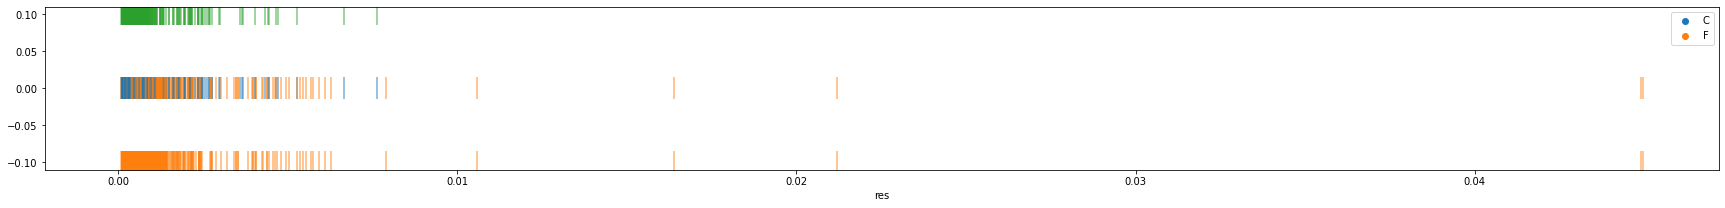

In [62]:
plt.rcParams["figure.figsize"]=30,3

sns.scatterplot( x =df_result['res'] ,y =0 , hue = df_result['kind'],marker='|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'F'] ,y =-0.1 ,marker='|',s=500,alpha = 0.5)
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'C'] ,y =0.1 ,marker='|',s=500,alpha = 0.5) 

plt.show()

In the above demographic, *y* is not important and is only used to have all three graphs separately in one plot.


First and last one show loss of 500 different correct and fraud data respectively.
The graph in between is overlapped of other two.


As we see the correct data loss are more dense and compressed to the left, while frauds are more sparsed.

(The difference is acutally so slight.)

In [63]:
batch_size = 1 #One by one

x_test_correct_dl = dt.DataLoader(X_test,batch_size=batch_size)
y_test_correct_dl = dt.DataLoader(y_test,batch_size=batch_size)

x_fraud_dl = dt.DataLoader(X_fraud ,batch_size=batch_size)
y_fraud_dl = dt.DataLoader(y_fraud,batch_size=batch_size)

In [64]:
del X_test
del y_test
del X_fraud
del y_fraud

In [65]:
df_result = pd.DataFrame()
df_result['kind'] = [] #F or C
df_result['res'] = []

#To test on equal number of correct and fraud data
cr_dl = iter(x_test_correct_dl)
fr_dl = iter(x_fraud_dl)

for i in range(5_000):
  if i%1000 == 0 :
    print(i)
  df_result = df_result.append({'res':test(next(cr_dl))  , 'kind':'C'} , ignore_index=True)
  df_result = df_result.append({'res':test(next(fr_dl))  , 'kind': 'F'} , ignore_index=True)
  

0
1000
2000
3000
4000


In [66]:
df_result.head(5)

,kind,res
0,C,0.000512
1,F,0.001393
2,C,0.000114
3,F,0.001203
4,C,0.000864


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

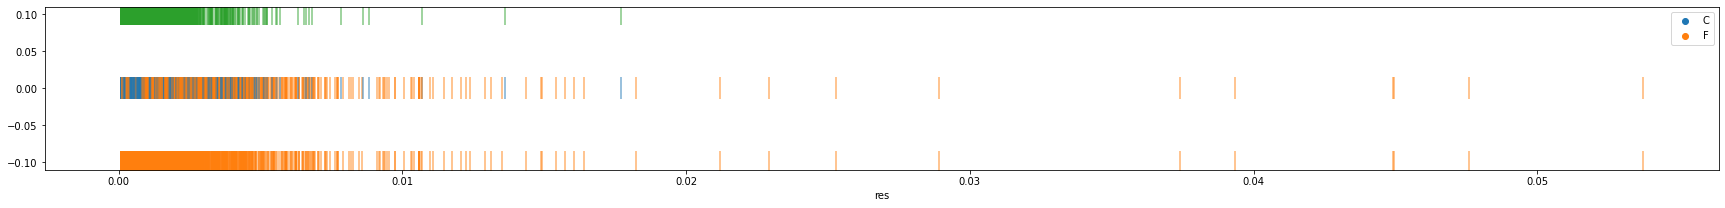

In [68]:
plt.rcParams["figure.figsize"]=30,3

sns.scatterplot( x =df_result['res'] ,y =0 , hue = df_result['kind'],marker='|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'F'] ,y =-0.1 ,marker='|',s=500,alpha = 0.5)
sns.scatterplot( x =df_result['res'][df_result['kind'] == 'C'] ,y =0.1 ,marker='|',s=500,alpha = 0.5) 

plt.show()

The result is somehow same as last plot.

It seems the seperator can be 0.002.

(It would be better if we created another neural network to predict whether a data loss value comming from autoencoder is for fraud or correct.)



In [70]:
y_predicts = []
y = []
separator = 0.002

for i in range(len(df_result)):

  if df_result.iloc[i]['kind'] == 'C':
    y.append(0)
  else:
    y.append(1)

  if df_result.iloc[i]['res'] < separator:
    y_predicts.append(0)
  else:
    y_predicts.append(1)
  

In [71]:
y_predicts[:5]

[0, 0, 0, 0, 0]

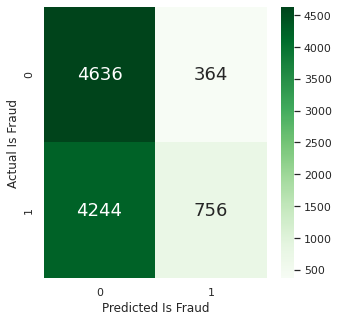

In [72]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix( y, y_predicts)
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual Is Fraud'
df_cm.columns.name = 'Predicted Is Fraud'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Greens",fmt="d", annot=True,annot_kws={"size": 18})# font size
plt.show()

In [73]:
 X_corr_valid_dl = dt.DataLoader(X_valid_corr,batch_size=1)
 X_fraud_valid_dl = dt.DataLoader(X_valid_fraud,batch_size=1)

In [74]:
len(X_corr_valid_dl)

57053

In [75]:
len(X_fraud_valid_dl)

2001

In [76]:
df_valid = pd.DataFrame()
df_valid['kind'] = [] #F or C
df_valid['res'] = []

#To test pn equal number of correct and fraud data
cr_valid_dl = iter(X_corr_valid_dl)
fr_valid_dl = iter(X_fraud_valid_dl)

for i in range(1_000):
  df_valid = df_valid.append({'res':test(next(cr_valid_dl))  , 'kind':'C'} , ignore_index=True)
  df_valid = df_valid.append({'res':test(next(fr_valid_dl))  , 'kind': 'F'} , ignore_index=True)
  # if i%1000 == 0:
  #   print(i)

In [77]:
df_valid.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
kind,C,F,C,F,C,F,C,F,C,F,C,F,C,F,C,F,C,F,C,F
res,0.000166433,0.00165752,0.000180593,0.000194151,0.000263578,0.000728399,0.000422885,0.0137623,0.000491091,0.00264483,0.000511958,0.00376892,0.00023456,0.000279555,0.000487422,0.000758465,0.000345656,0.00148679,0.000575202,0.000787362


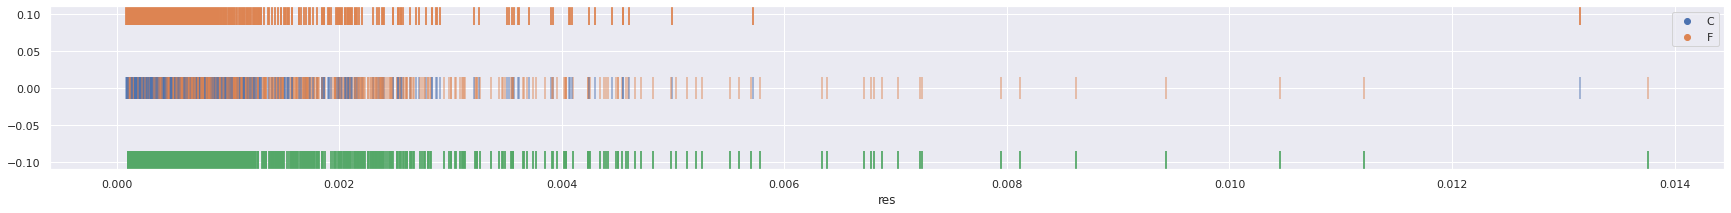

In [78]:
sns.scatterplot( x =df_valid['res'] ,y =0 , hue = df_valid['kind'],marker = '|',s=500,alpha = 0.5) #Height is not important
sns.scatterplot( x =df_valid['res'][df_valid['kind']=='C'] ,y =0.1 ,marker = '|',s=500,alpha = 1)
sns.scatterplot( x =df_valid['res'][df_valid['kind']=='F'] ,y =-0.1 ,marker = '|',s=500,alpha = 1)
plt.show()

In [79]:
del df_valid
del fr_valid_dl
del cr_valid_dl
del X_corr_valid_dl
del X_fraud_valid_dl
del df_result

In [80]:
y_predicts = []
y = []
separator = 0.0025

for i in range(len(df_valid)):

  if df_valid.iloc[i]['kind'] == 'C':
    y.append(0)
  else:
    y.append(1)

  if df_valid.iloc[i]['res'] < separator:
    y_predicts.append(0)
  else:
    y_predicts.append(1)

In [81]:
y_predicts[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [82]:
y[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [83]:
#Calculate Accuracy on Validation
correct = 0.0
for i in range(len(y)):
  if y_predicts[i] == y[i]:
    correct = correct +1
print(correct/len(y) , correct)

0.535 1070.0


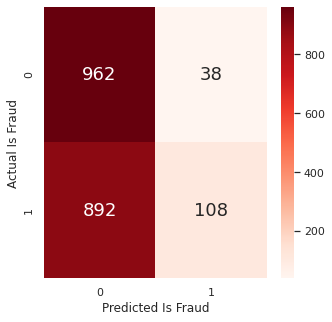

In [84]:
data = confusion_matrix( y, y_predicts)
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual Is Fraud'
df_cm.columns.name = 'Predicted Is Fraud'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Reds",fmt="d", annot=True,annot_kws={"size": 18})# font size
plt.show()

In [85]:
del df_valid
del y 
del y_predicts

In [86]:
torch.save(model.state_dict(), 'weights.pkl')

##Result on Test Set:

In [87]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/test_transaction.csv')
df_test_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj3/Proj3/test_identity.csv')[['TransactionID','DeviceType']]

In [88]:
df_test = pd.merge(df_test,df_test_id,on='TransactionID',how='outer')

In [89]:
df_test.shape

(506691, 394)

In [90]:
ID = df_test['TransactionID']

In [91]:
del df_test_id #make ram free

In [92]:
df_test.drop(labels=['TransactionID'],axis = 1, inplace=True)

In [93]:
df_test = pd.get_dummies(df_test)

In [94]:
for c in df_test.columns:
  if df_test[c].isnull().sum() == len(df_test[c]):
    df_test.drop(labels = [c],axis = 1,inplace = True)
    continue

  df_test[c] = df_test[c].fillna(np.nanmedian(df_test[c]))

In [95]:
for c in df_test.columns:

  min = df_test[c].min()
  max = df_test[c].max()
  df_test[c] = ((df_test[c]-min)/max).astype('float16')
  if df_test[c].isnull().sum() == len(df_test[c]):
    df_test.drop(labels = [c],axis = 1,inplace = True)

In [96]:
df_test.shape

(506691, 531)

In [97]:
x = torch.unsqueeze(torch.FloatTensor(df_test.values),1)

In [98]:
x.shape

torch.Size([506691, 1, 531])

In [99]:
ID.isna().sum()

0

In [116]:
df_result = pd.DataFrame()
df_result['TransactionID'] = []
df_result['isFraud'] = []

#To test on equal number of correct and fraud data
for i in range(len(ID)):
  df_result =  df_result.append( {'isFraud':test(x[i]), 'TransactionID':ID[i] } , ignore_index=True)
  if i%50_000 == 0:
    print(i)
  

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000


In [ ]:
df_result.head(20)

In [125]:
res = []
separator
for i in range(len(df_result)):
  if df_result['isFraud'][i] < separator:
    res.append(0)
  else:
    res.append(1)

In [126]:
pd.Series(res).value_counts()

1    506691
dtype: int64

In [127]:
df_result['TransactionID'] = ID.astype('int32')

In [128]:
df_result['isFraud'] = res

In [129]:
pd.Series(df_result['isFraud']).value_counts()

1    506691
Name: isFraud, dtype: int64

In [130]:
df_result.shape

(506691, 2)

In [137]:
df_result.to_csv('Result.csv',index=False)